In [1]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [2]:
import pandas as pd
import numpy as np
import re

In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [4]:
import nltk
nltk.download("popular")

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to
[nltk_data]    |     C:\Users\yaswa\AppData\Roaming\nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to
[nltk_data]    |     C:\Users\yaswa\AppData\Roaming\nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to
[nltk_data]    |     C:\Users\yaswa\AppData\Roaming\nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to
[nltk_data]    |     C:\Users\yaswa\AppData\Roaming\nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to
[nltk_data]    |     C:\Users\yaswa\AppData\Roaming\nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]   

True

In [5]:
df=pd.read_excel('Group3-news-text-sanitized (1).xlsx')

In [6]:
df = df.drop_duplicates('Tweet',keep='first')
df['Tweet'].count()

10138

In [7]:
df["Cleaned_Tweet"] = [re.sub(r"(@[A-Za-z0–9_]+)|[^\w\s]|#|http\S+", "", v.lower()) for v in df["Tweet"]]
df

,Category,Confidence,Tweet,Cleaned_Tweet
0,Not Relevant,1.0000,Hey! How are you?,hey how are you
1,Not Relevant,1.0000,What's up man?,whats up man
2,Not Relevant,1.0000,I love fruits,i love fruits
3,Not Relevant,1.0000,Summer is lovely,summer is lovely
4,Not Relevant,1.0000,My car is so fast,my car is so fast
...,...,...,...,...
10318,Relevant,0.3994,Make man pikin crash ??????,make man pikin crash
10319,Relevant,0.3994,Disregard my snap story there is an angry whit...,disregard my snap story there is an angry whit...
10320,Relevant,0.3982,#tornado #singapore Mac and #cheese #around th...,tornado singapore mac and cheese around the wo...
10321,Not Relevant,0.3367,Check out more data on Upper Wabash reservoirs...,check out more data on upper wabash reservoirs...


In [8]:
df.drop('Tweet',axis=1)

,Category,Confidence,Cleaned_Tweet
0,Not Relevant,1.0000,hey how are you
1,Not Relevant,1.0000,whats up man
2,Not Relevant,1.0000,i love fruits
3,Not Relevant,1.0000,summer is lovely
4,Not Relevant,1.0000,my car is so fast
...,...,...,...
10318,Relevant,0.3994,make man pikin crash
10319,Relevant,0.3994,disregard my snap story there is an angry whit...
10320,Relevant,0.3982,tornado singapore mac and cheese around the wo...
10321,Not Relevant,0.3367,check out more data on upper wabash reservoirs...


In [9]:
vals_to_replace = {'Relevant':1, 'Not Relevant':0}
df['Category'] = df['Category'].map(vals_to_replace)

In [10]:
df.dropna(inplace=True)

In [11]:
df['Category'].unique()

array([0., 1.])

In [12]:
X_train, X_test, y_train, y_test = train_test_split(df['Cleaned_Tweet'], df['Category'], test_size=0.2, random_state=42)

In [13]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
X_train_sequences = tokenizer.texts_to_sequences(X_train)
X_test_sequences = tokenizer.texts_to_sequences(X_test)

In [14]:
max_sequence_length = 100  
X_train_padded = pad_sequences(X_train_sequences, maxlen=max_sequence_length)
X_test_padded = pad_sequences(X_test_sequences, maxlen=max_sequence_length)

In [15]:
from keras.layers import Dense, Activation, Flatten,Dropout

In [16]:
model = Sequential()
model.add(Embedding(len(tokenizer.word_index) + 1, 32, input_length=max_sequence_length))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

In [17]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train_padded, y_train, validation_data=(X_test_padded, y_test), epochs=5, batch_size=32)

Epoch 1/5
254/254 [==============================] - 4s 12ms/step - loss: 0.5992 - accuracy: 0.6742 - val_loss: 0.4601 - val_accuracy: 0.7980
Epoch 2/5
254/254 [==============================] - 5s 18ms/step - loss: 0.3417 - accuracy: 0.8647 - val_loss: 0.4443 - val_accuracy: 0.8015
Epoch 3/5
254/254 [==============================] - 5s 18ms/step - loss: 0.1494 - accuracy: 0.9504 - val_loss: 0.5103 - val_accuracy: 0.7960
Epoch 4/5
254/254 [==============================] - 5s 19ms/step - loss: 0.0820 - accuracy: 0.9752 - val_loss: 0.5975 - val_accuracy: 0.7926
Epoch 5/5
254/254 [==============================] - 4s 16ms/step - loss: 0.0642 - accuracy: 0.9798 - val_loss: 0.5924 - val_accuracy: 0.7753


In [18]:
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix

In [19]:
y_pred = model.predict(X_test_padded)
auc = roc_auc_score(y_test, y_pred)
print("AUC:", auc)

64/64 [==============================] - 0s 2ms/step
AUC: 0.8473628789214664


In [20]:
import matplotlib.pyplot as plt

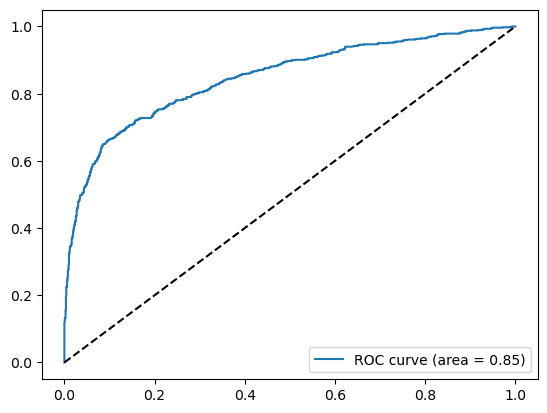

In [21]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.legend(loc="lower right")
plt.show()

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10124 entries, 0 to 10322
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Category       10124 non-null  float64
 1   Confidence     10124 non-null  float64
 2   Tweet          10124 non-null  object 
 3   Cleaned_Tweet  10124 non-null  object 
dtypes: float64(2), object(2)
memory usage: 395.5+ KB
